# Project 7` 

### Part 1 - Chart a Straight Line

In [1]:
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

To convert Fahrenheit to Celsius, we can use the formula: (f - 32) * 5 / 9 

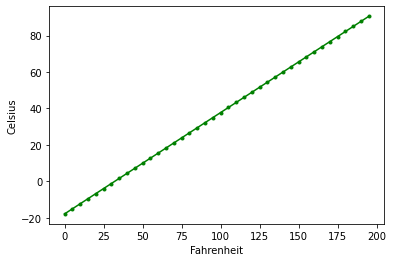

In [2]:
# Define the lambda function for Fahrenheit to Celsius conversion
f_to_c = lambda f: (f - 32) * 5 / 9

# Generate Fahrenheit temperatures
fahrenheit_temps = list(range(0, 200, 5))

# Convert Fahrenheit temperatures to Celsius and store them in a list of tuples
temps = [(f, f_to_c(f)) for f in fahrenheit_temps]

# Create a DataFrame from the list of tuples
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Plot the relationship between Fahrenheit and Celsius temperatures
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-', color='green', legend=False)

# Set the y-label
axes.set_ylabel('Celsius')

# Set legend color
#plt.gca().get_legend().get_texts()[0].set_color('blue')

# Show the plot
plt.show()

### Part 2 - Predict Avg High Temp in NYC in January

#### Section 1 - Data Acquisition

In [3]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

#### Section 2 - Data Inspection

In [4]:
# Initial data check 
nyc.head(3)

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [5]:
# Initial data check 
nyc.tail(3)

,Date,Value,Anomaly
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


#### Section 3 - Data Cleaning

In [6]:
# Initial data cleaning
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [7]:
nyc.Date.dtype

dtype('int64')

In [8]:
# Clean the Date column
nyc.Date = nyc.Date.floordiv(100)

#### Section 4 - Descriptive Statistics

In [9]:
# Show basic descriptive statistics
nyc['Temperature'].describe()

count    124.000000
mean      37.595161
std        4.539848
min       26.100000
25%       34.575000
50%       37.600000
75%       40.600000
max       47.600000
Name: Temperature, dtype: float64

#### Section 5 - Build the Model

In [10]:
# Calculating regression line's slope and intercept
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [11]:
# Linear Regression Slope
linear_regression.slope

0.014771361132966163

In [12]:
# Linear Regression Intercept
linear_regression.intercept

8.694993233674289

#### Section 6 - Predict

In [13]:
# Predicting average temperature in JAN 2024 
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

In [14]:
# Approximating January 1890 average tempature
#linear_regression.slope * 1890 + linear_regression.intercept

#### Section 7 - Visualizations

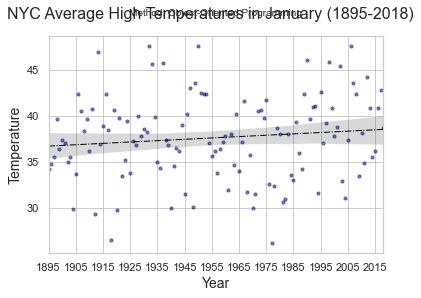

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn theme
sns.set_theme(style='whitegrid')

# Create the regression plot
axes = sns.regplot(x='Date', y='Temperature', data=nyc,
                   scatter_kws={"color": "darkblue", "alpha": 0.5, "s": 10},
                   line_kws={"color": "black", "lw": 1, "ls": "-."})

# Add title, subtitle, and labels to the plot
plt.suptitle('NYC Average High Temperatures in January (1895-2018)', fontsize=16)
axes.set_title('Method: Object-Oriented Programming', fontsize=10, pad=20)
axes.set_xlabel('Year', fontsize=14)
axes.set_ylabel('Temperature', fontsize=14)

# Customize ticks
axes.set_xticks(range(min(nyc.Date), max(nyc.Date), 10)) 

# Display the plot
plt.show()

### Part 3 - Predict Avg High Temp in NYC in January

#### Section 1 - Build the Model

##### Splitting the Data for Training and Testing

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)

In [17]:
X_train.shape

(93, 1)

In [18]:
X_test.shape

(31, 1)

##### Training the Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
linear_regression = LinearRegression()

In [21]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
linear_regression.coef_

array([0.01939167])

In [23]:
linear_regression.intercept_

-0.30779820252656975

#### Section 2 - Test the Model

In [24]:
predicted = linear_regression.predict(X_test)

In [25]:
expected = y_test

In [26]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


#### Section 3 - Predict

##### Predicting Future Temperatures and Estimating Past Temperatures 

In [27]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [28]:
predict(2024)

array([38.94094855])

#### Section 3 - Visualizations

In [29]:
import seaborn as sns

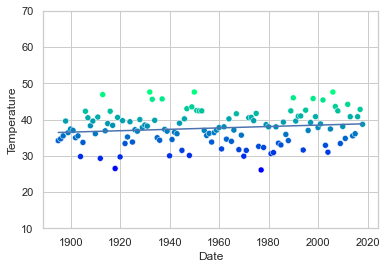

In [30]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)

### Part 4 - Insights

##### Insights from the Plots

A. The scatter plot visualizing the dataset with the regression line likely shows the relationship between the year (independent variable) and the average high temperature in January (dependent variable) in New York City.

B. If the regression line has a positive slope, it suggests a long-term warming trend in January temperatures over the years. Conversely, a negative slope would indicate a cooling trend.

C. The density of data points around the regression line and their distribution can provide insights into the variability of January temperatures over the years. A tight clustering of points around the line would suggest less variability and a stronger linear relationship between the year and temperature.

D. Outliers would be visible as points significantly distant from the regression line, possibly indicating years with unusually high or low January temperatures compared to the linear trend.

##### Insights from the Results

A. The coefficient (slope of the regression line) represents the change in temperature for each year. A positive coefficient suggests an increase in average temperatures over time, which could be interpreted as evidence of global warming, at least in the context of New York City's January temperatures.

B. The intercept represents the predicted temperature at year 0 (not practically meaningful but mathematically relevant). It serves as a baseline from which the temperature changes according to the slope.

C. Predictions for years 2019 and 2020 extend the analysis beyond the dataset, testing the model's forecasting capability. If these predictions align closely with actual recorded temperatures for those years (not included in the dataset), it would validate the model's applicability for short-term future forecasting.

D. Predicting temperatures for years like 1890 and 1889, before the dataset's range, tests the model's backward extrapolation capability. Significant deviations from known historical records (if available) for these years could highlight limitations in the model's predictive accuracy over time periods far from the dataset's temporal scope.

E. By comparing predicted temperatures against actual (expected) temperatures for the test set, the model's accuracy and reliability are assessed. A close match would indicate good model performance.

F. This comparison also provides insight into the model's generalization capability, i.e., how well it predicts temperatures for years it was not trained on.

##### Other general insights

A. The linear regression model's ability to predict January temperatures in New York City offers a simplified view of temperature trends over time. However, the simplicity of linear regression also means it might not capture more complex patterns or the effects of other influencing factors (like volcanic eruptions, significant policy changes, or technological advancements).

B.The analysis serves as a foundational approach to time series forecasting, illustrating how historical data can be used to understand trends and make predictions. However, for comprehensive climate modeling, more sophisticated models that can incorporate multiple variables and account for non-linear relationships are necessary.

### Part 5 - Bonus

#### Section 1 - Load the Data

In [31]:
from sklearn.datasets import fetch_california_housing
# Fetch the dataset
housing = fetch_california_housing()
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target

print(df.head(3))



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  


#### Section 2 - Exploratory Data Analysis and Visualization

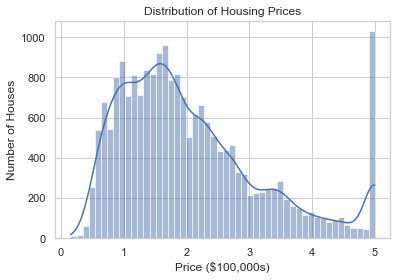

In [32]:
# Visualize the distribution of the target variable
sns.histplot(df['Target'], bins=50, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price ($100,000s)')
plt.ylabel('Number of Houses')
plt.show()


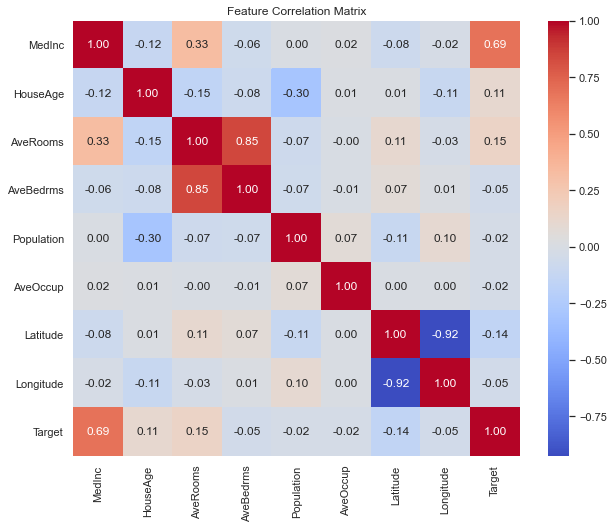

In [33]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

#### Section 3 - Prepare the aata for training

In [34]:
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Section 4 - Training and Testing the Model

We choose linear regression and random forest models to train, and select a better model using Mean Squared Error (MSE) in the testing dataset.

In [35]:
from sklearn.metrics import mean_squared_error

# Initialize the model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

Linear Regression MSE: 0.5558915986952441


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

Random Forest MSE: 0.2557936046054007


#### Section 5 - Choosing the Best Model

To choose the better model, we compare their MSE values. The model with the lowest MSE on the testing  dataset is generally considered better for prediction accuracy. Here, we have MSE for random forest (MSE=0.25) is lower than the linear regression (MSE=0.56), so we choose the random forest as the better model.

#### Section 6 - Visualizing Model Performance

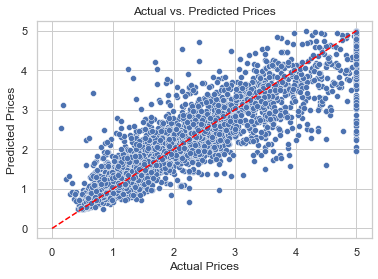

In [37]:
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([0, 5], [0, 5], '--', color='red')  # A reference line
plt.show()